In [ ]:
# use tensorflow version 1.x
%tensorflow_version 1.x

import numpy              as np
import matplotlib.pyplot  as plt
import keras

In [ ]:
# install kneed to automatically estimate knee in the curve
# https://pypi.org/project/kneed/
pip install kneed

In [ ]:
# load a trained model saved in model_path [str]
model_path = 'trained_model/model_final.h5'
model = keras.models.load_model(model_path)

In [ ]:
# load a .npy file sotored in data_path
data_path = 'data/data_10_05_6500_7500_MIG_INVERS.npy'

X_pred = np.load(data_path)

In [ ]:
# predict X_pred.
# X_pred must be a ndarray with [sample, time, 1]
# y_pred is a matrix with [sample, time, 2]
# y_pred[:,:, 0] returns value 1 if no horizon is found
# y_pred[:,:, 1] returns value 1 if horizon is found     <-- we take this
y_pred = model.predict(X_pred, verbose=1)[:,:,1]
# predict the reversed in time version if X_pred and revert in time the output to return to normal data
y_predCON = model.predict(X_pred[:,::-1,:], verbose=1)[:,::-1,1]

1001/1001 [==============================] - 3s 3ms/step


In [ ]:
# compute geometric mean
y_pred_final = np.sqrt((y_pred*y_predCON))

In [ ]:
# threshold evaluation:
# init a linearly space vector from 0 to 1 with ntest values
ntest = 500
thers = np.linspace(0, 1, ntest)
# init k pointer and output vector 
k = 0
thers_val =np.zeros(ntest)
#for each threshold valie in thers
for i in thers:
  # add to vector thers_val the corresponding points that are > of ith thers
  thers_val[k]= np.where(y_pred_final>i)[0].shape[0]
  # increment pointer
  k+=1

In [ ]:
from kneed import KneeLocator
# import KneeLocator to find the knee of the function thers_val and store correspondig thershold value to kn
kn = KneeLocator(thers, thers_val, curve='convex', direction='decreasing')

Text(0.8, 1000000, 'Best Threshold: 0.02')

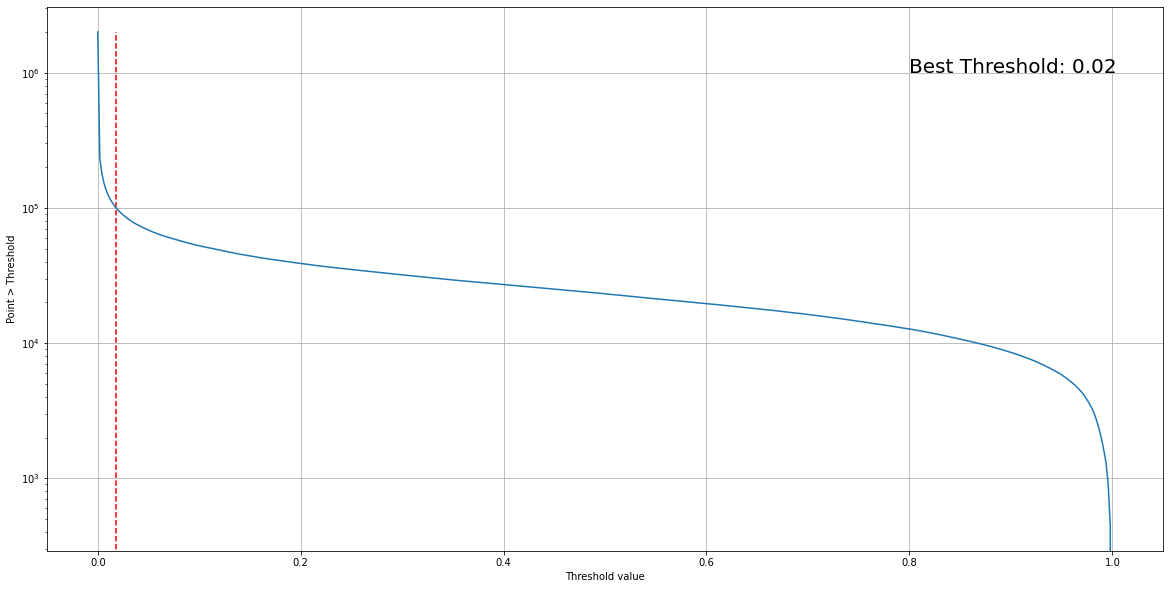

In [ ]:
# plot (threshold value) vs (Point > threshold) and selected threshold as a red vertical line
plt.figure(figsize=[20,10])
plt.grid(True)
plt.xlabel('Threshold value')
plt.ylabel('Point > Threshold')
plt.semilogy(thers, thers_val)
plt.vlines(kn.knee, 0, thers_val.max(), 'r', '--')
plt.text(0.8, 1*10**6, 'Best Threshold: ' + np.str(kn.knee.round(decimals=2)), fontsize=20 )

In [ ]:
# find the points > kn
x, z = np.where(y_pred_final > kn.knee.round(decimals=2))

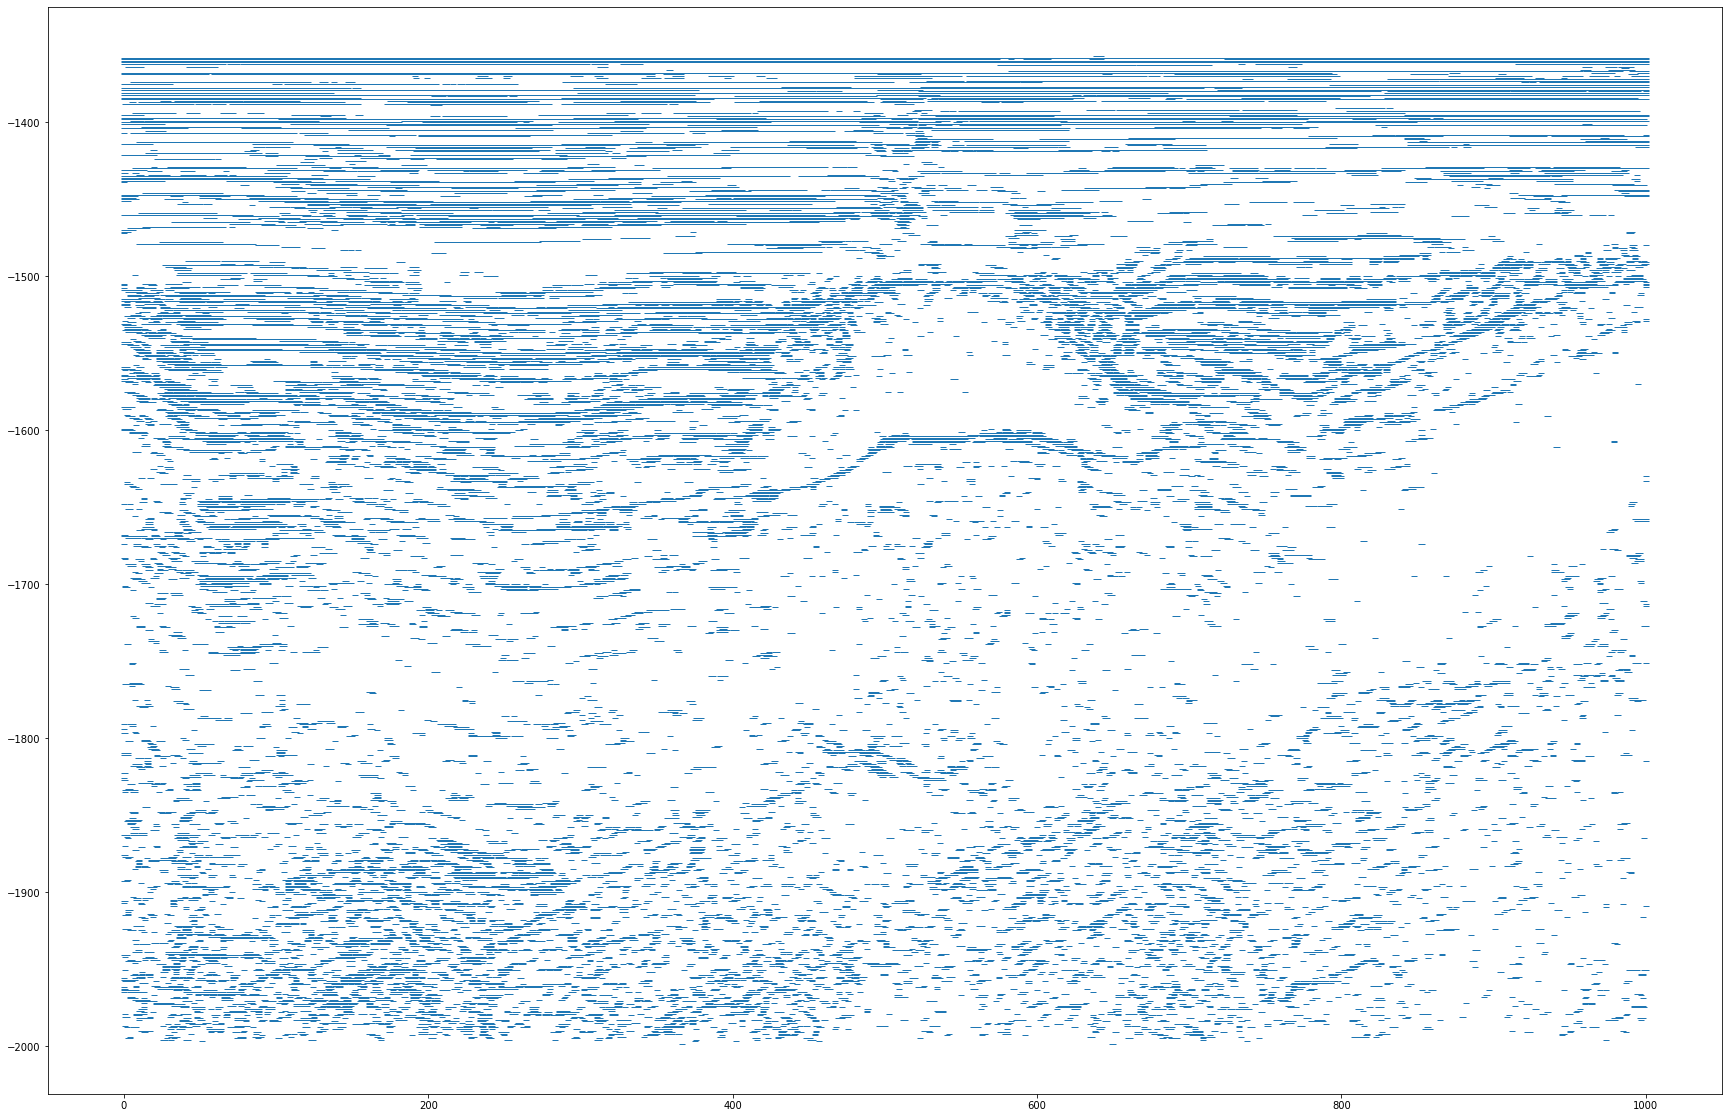

In [ ]:
# plot result
plt.figure(figsize=[30,20])
plt.plot(x, -z, '_', linewidth=0.01)